<a href="https://colab.research.google.com/github/MizanMustakim/BIT_Machine_Learning_Course_Assignments_2022/blob/main/CNN_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN model on [mnist](https://en.wikipedia.org/wiki/MNIST_database) dataset

### Importing necessary libraries

In [ ]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

### Working on the dataset

In [ ]:
# loading Data
train, test = mnist.load_data()

# separte the data into label and images
train_img, train_labels = train[0], train[-1]
test_img, test_labels = test[0], test[-1]

training_images = np.expand_dims(train_img, axis=3)
testing_images = np.expand_dims(test_img, axis=3)

Visualize the things into the dataset

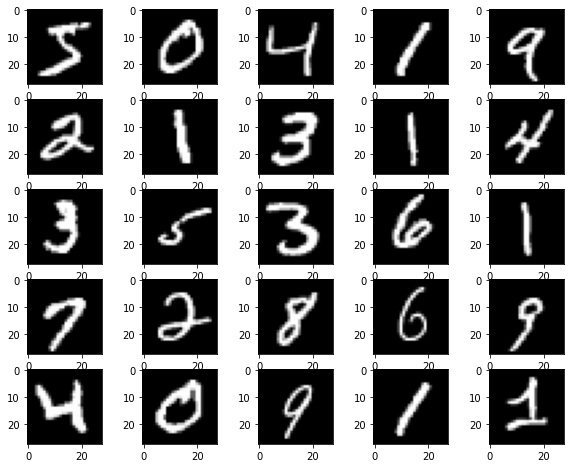

In [ ]:
plt.figure(figsize=(10,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    # plot raw pixel data
    plt.imshow(train_img[i], cmap=plt.get_cmap('gray'))
plt.show()

### Image Augmentation using [Image Generator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
# Create an ImageDataGenerator and do Image Augmentation and create generator
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    shear_range= 0.1,
    zoom_range= 0.1,
    horizontal_flip= True,
    fill_mode= "nearest"
)

train_gen = train_datagen.flow(
    training_images,
    train_labels,
    batch_size= 28
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255.)

val_gen = validation_datagen.flow(
    testing_images,
    test_labels,
    batch_size= 28
)   

print("Training Image shape:",train_img.shape)
print("Testing Image shape:",test_img.shape)

Training Image shape: (60000, 28, 28)
Testing Image shape: (10000, 28, 28)


### CNN model training session

Building the CNN model architecture

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

Compile the model and train it according to the architecture.

In [ ]:
# Compile Model. 
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               verbose=0, mode='auto')

# Train the Model
history = model.fit(train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[early_stopping])

model.save("cnn_mnist.h5")

Epoch 1/30
2143/2143 [==============================] - 28s 11ms/step - loss: 0.8317 - accuracy: 0.7164 - val_loss: 0.2624 - val_accuracy: 0.9112
Epoch 2/30
2143/2143 [==============================] - 25s 11ms/step - loss: 0.4106 - accuracy: 0.8665 - val_loss: 0.2844 - val_accuracy: 0.9030
Epoch 3/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.3216 - accuracy: 0.8970 - val_loss: 0.1693 - val_accuracy: 0.9452
Epoch 4/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.2807 - accuracy: 0.9104 - val_loss: 0.1500 - val_accuracy: 0.9515
Epoch 5/30
2143/2143 [==============================] - 25s 12ms/step - loss: 0.2478 - accuracy: 0.9213 - val_loss: 0.1253 - val_accuracy: 0.9592
Epoch 6/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.2348 - accuracy: 0.9251 - val_loss: 0.1243 - val_accuracy: 0.9600
Epoch 7/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.2208 - accuracy: 0.9316 - val_loss: 0.1315 -

### Visualize the model

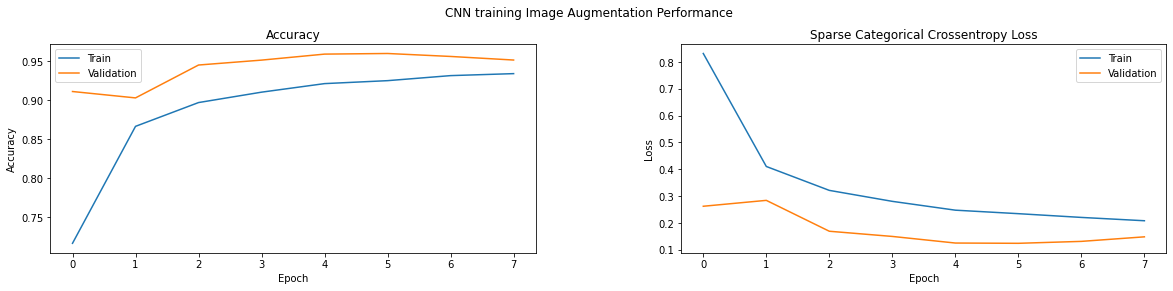

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('CNN training on MNIST dataset using Image Augmentation Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history.history['accuracy'], label='Train')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(history.history['loss'], label='Train')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Sparse Categorical Crossentropy Loss')
l2 = ax2.legend(loc="best")

# CNN model on [fashion_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset

In [ ]:
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

### Working on the dataset

In [ ]:
# loading Data
train, test = fashion_mnist.load_data()

# separte the data into label and images
train_img, train_labels = train[0], train[-1]
test_img, test_labels = test[0], test[-1]

training_images = np.expand_dims(train_img, axis=3)
testing_images = np.expand_dims(test_img, axis=3)

Visualize the things into the dataset

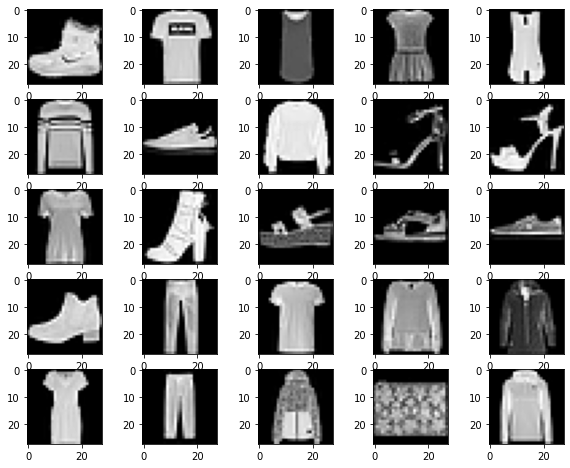

In [ ]:
plt.figure(figsize=(10,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    # plot raw pixel data
    plt.imshow(train_img[i], cmap=plt.get_cmap('gray'))
plt.show()

### Image Augmentation using [Image Generator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
# Create an ImageDataGenerator and do Image Augmentation and create generator
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    shear_range= 0.1,
    zoom_range= 0.1,
    horizontal_flip= True,
    fill_mode= "nearest"
)

train_gen = train_datagen.flow(
    training_images,
    train_labels,
    batch_size= 28
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255.)

val_gen = validation_datagen.flow(
    testing_images,
    test_labels,
    batch_size= 28
)   

print("Training Image shape:",train_img.shape)
print("Testing Image shape:",test_img.shape)

Training Image shape: (60000, 28, 28)
Testing Image shape: (10000, 28, 28)


### CNN model training session

Building the CNN model architecture

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

Compile the model and train it according to the architecture.

In [ ]:
# Compile Model. 
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               verbose=0, mode='auto')

# Train the Model
history = model.fit(train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[early_stopping])

model.save("cnn_fashion_mnist.h5")

Epoch 1/30
2143/2143 [==============================] - 25s 11ms/step - loss: 0.9600 - accuracy: 0.6359 - val_loss: 0.7111 - val_accuracy: 0.7300
Epoch 2/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.7080 - accuracy: 0.7335 - val_loss: 0.5981 - val_accuracy: 0.7695
Epoch 3/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.6447 - accuracy: 0.7552 - val_loss: 0.6044 - val_accuracy: 0.7726
Epoch 4/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.6044 - accuracy: 0.7708 - val_loss: 0.5679 - val_accuracy: 0.7900
Epoch 5/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.5743 - accuracy: 0.7836 - val_loss: 0.5710 - val_accuracy: 0.7919
Epoch 6/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.5586 - accuracy: 0.7917 - val_loss: 0.5650 - val_accuracy: 0.7934
Epoch 7/30
2143/2143 [==============================] - 24s 11ms/step - loss: 0.5383 - accuracy: 0.7989 - val_loss: 0.5026 -

### Visualize the model

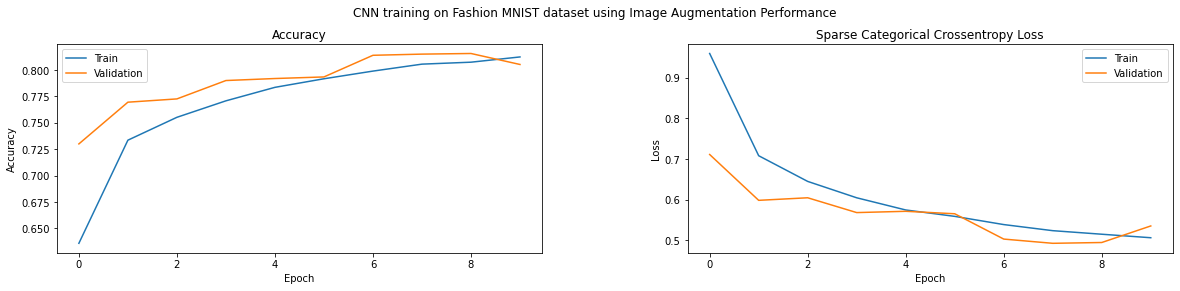

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('CNN training on Fashion MNIST dataset using Image Augmentation Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(history.history['accuracy'], label='Train')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(history.history['loss'], label='Train')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Sparse Categorical Crossentropy Loss')
l2 = ax2.legend(loc="best")